In [168]:
import charts_function_list
import os

In [2]:
base_path,data,_ = function_list.folder_setup()

In [3]:
os.chdir(data)

In [186]:
board_games = pd.read_csv('bgg_db_2017_04.csv',encoding='latin-1')

### Some initial explorations

In [70]:
board_games.corr()[board_games.corr()>.5].fillna('')

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
rank,1,,,,,,,,,,,,,
game_id,,1,,,,,,,,,,,,
min_players,,,1,,,,,,,,,,,
max_players,,,,1,,,,,,,,,,
avg_time,,,,,1,0.873736,0.999909,,,,,,,
min_time,,,,,0.873736,1,0.873613,,,,,,,
max_time,,,,,0.999909,0.873613,1,,,,,,,
year,,,,,,,,1,,,,,,
avg_rating,,,,,,,,,1,,,,,0.538311
geek_rating,,,,,,,,,,1,0.636099,,0.629257,


### A look at the top 5 most prolific designers' games

In [195]:

board_games = board_games[~board_games['designer'].isin(['(Uncredited)','none'])].reset_index(drop=True)
#board_games = board_games[board_games['num_votes']>=500.500]  #filter to only include games rated > than median

rating_group_ = board_games.groupby('designer')
means = rating_group_.mean()['geek_rating']
counts = rating_group_.count()['rank']
counts.sort_values(ascending=False).head(5).index
top_5 = counts.sort_values(ascending=False).head(5).index
top_10 = counts.sort_values(ascending=False).head(10)

### Preliminary look at top board game designers with k-means

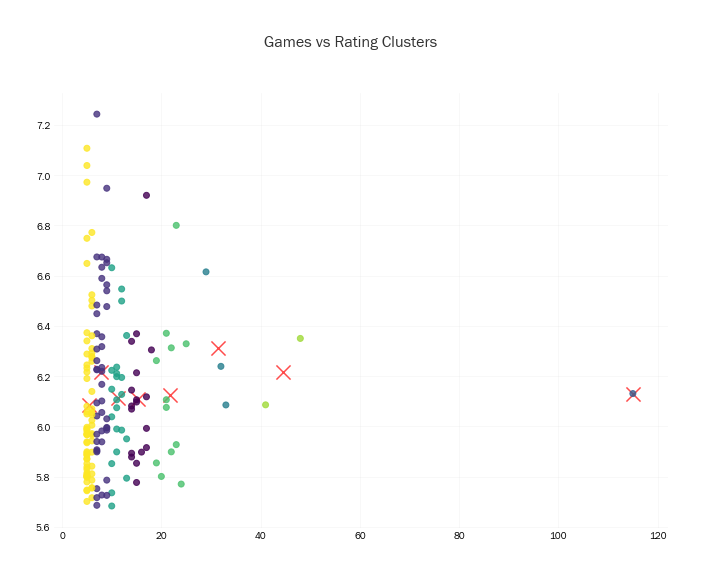

In [201]:
#assess via kmeans

top_designers = board_games['designer'].value_counts()[board_games['designer'].value_counts()>=5]
board_games_top_design=board_games[board_games['designer'].isin(top_designers.index)]

rating_group_ = board_games_top_design.groupby('designer')
means = rating_group_.mean()['geek_rating']
counts = rating_group_.count()['rank']

from sklearn.cluster import KMeans

f1 = means.values
f2 = counts.values

X=np.matrix(list(zip(f1,f2)))
kmeans = KMeans(n_clusters=8).fit(X)

chart_object = charts_function_list.chart_maker('Games vs Rating Clusters')
fig = chart_object.initial_fig_axis()
ax = chart_object.axes_set_up(fig)
ax.scatter(counts,means,alpha=.8,c=kmeans.labels_,zorder=2)
for x,y in kmeans.cluster_centers_ :
    ax.scatter(y,x,marker='x',color='red',s=200,zorder=1,alpha=.7)
plt.show()